In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
dados = pd.read_csv('../dados/heart_disease.csv')

In [3]:
dados 

Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
0       Male   39   postgraduate              0         0.0     0.0   
1     Female   46  primaryschool              0         0.0     0.0   
2       Male   48     uneducated              1        20.0     0.0   
3     Female   61       graduate              1        30.0     0.0   
4     Female   46       graduate              1        23.0     0.0   
...      ...  ...            ...            ...         ...     ...   
4233    Male   50     uneducated              1         1.0     0.0   
4234    Male   51       graduate              1        43.0     0.0   
4235  Female   48  primaryschool              1        20.0     NaN   
4236  Female   44     uneducated              1        15.0     0.0   
4237  Female   52  primaryschool              0         0.0     0.0   

     prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                 no             0         0    195.0  106.0   70.0  26.97   
1                 no             0         0    250.0  121.0   81.0  28.73   
2                 no             0         0    245.0  127.5   80.0  25.34   
3                 no             1         0    225.0  150.0   95.0  28.58   
4                 no             0         0    285.0  130.0   84.0  23.10   
...              ...           ...       ...      ...    ...    ...    ...   
4233              no             1         0    313.0  179.0   92.0  25.97   
4234              no             0         0    207.0  126.5   80.0  19.71   
4235              no             0         0    248.0  131.0   72.0  22.00   
4236              no             0         0    210.0  126.5   87.0  19.16   
4237              no             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose Heart_ stroke  
0          80.0     77.0            No  
1          95.0     76.0            No  
2          75.0     70.0            No  
3          65.0    103.0           yes  
4          85.0     85.0            No  
...         ...      ...           ...  
4233       66.0     86.0           yes  
4234       65.0     68.0            No  
4235       84.0     86.0            No  
4236       86.0      NaN            No  
4237       80.0    107.0            No  

[4238 rows x 16 columns]

In [4]:
dados.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke'],
      dtype='object')

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [6]:
dados.shape

(4238, 16)

In [7]:
dados.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [8]:
dados = dados[~dados['education'].isnull() ]
dados = dados[~dados['cigsPerDay'].isnull()]
dados = dados[~dados['BPMeds'].isnull()]
dados = dados[~dados['totChol'].isnull()]
dados = dados[~dados['BMI'].isnull()]
dados = dados[~dados['heartRate'].isnull()]
dados = dados[~dados['glucose'].isnull()]

In [9]:
dados.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

In [10]:
numerical_features = dados.select_dtypes(include=[np.number]).columns

c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


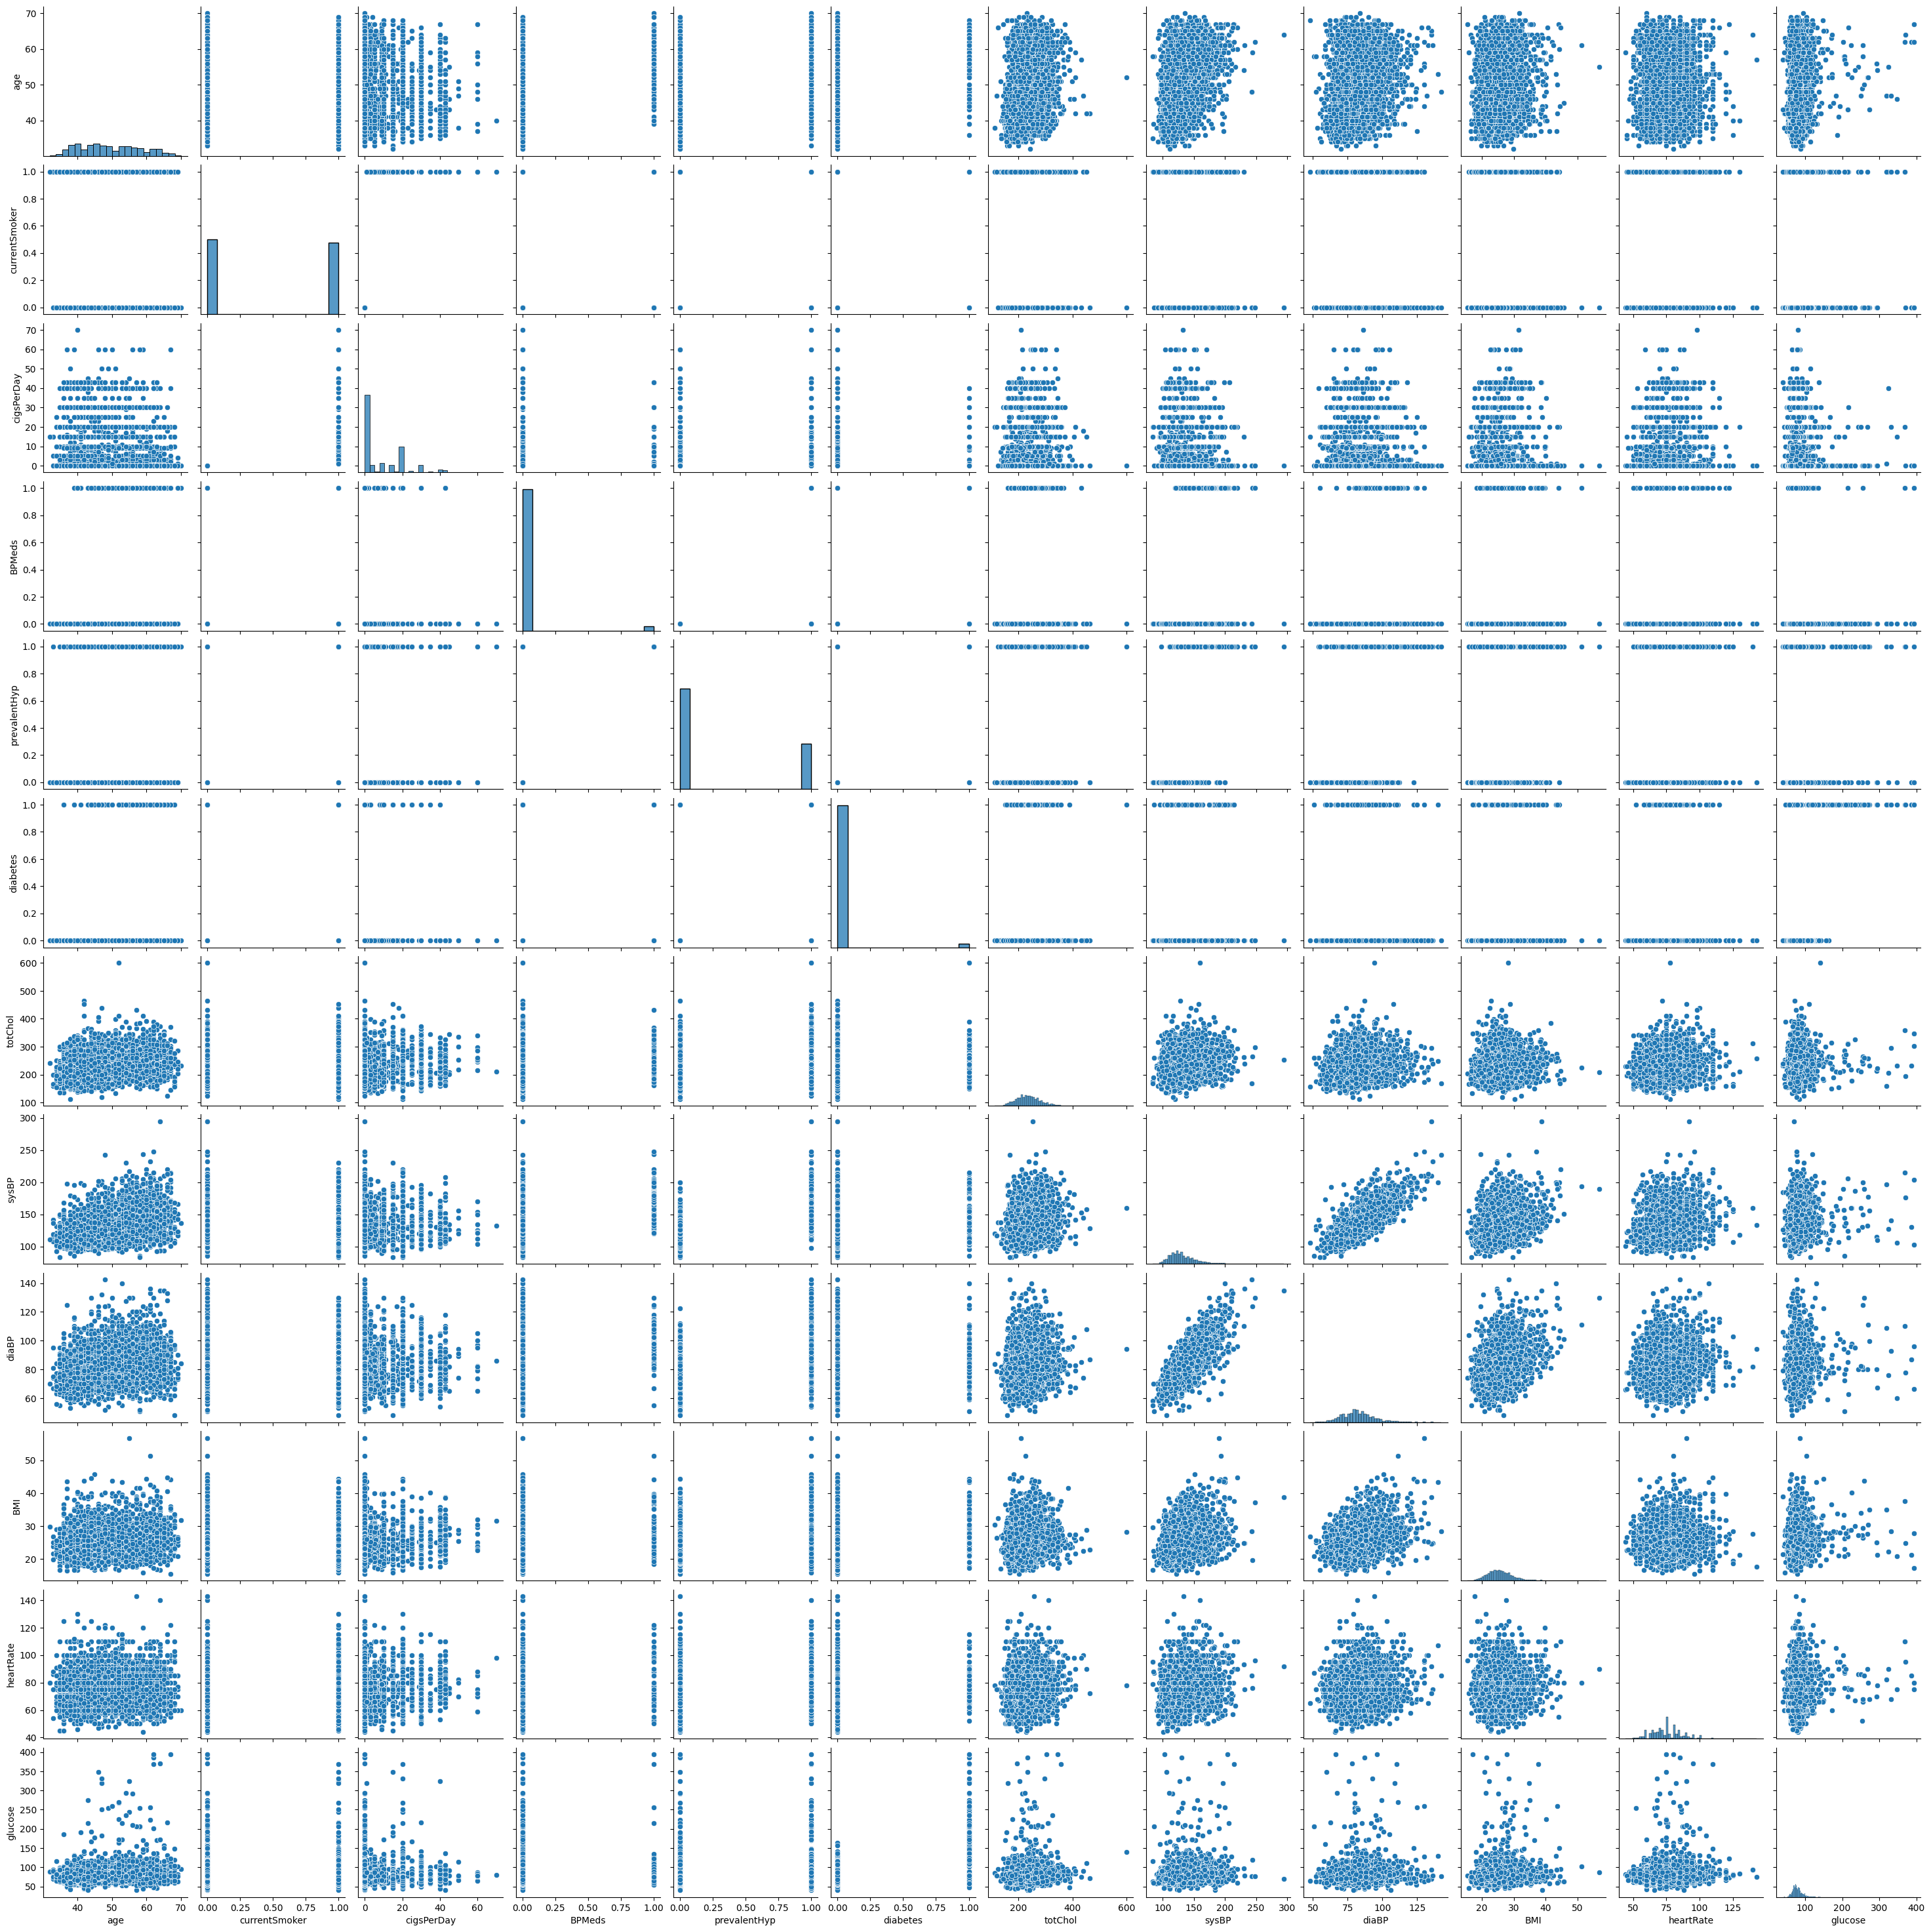

In [14]:
sns.pairplot(dados[numerical_features])

<Axes: >

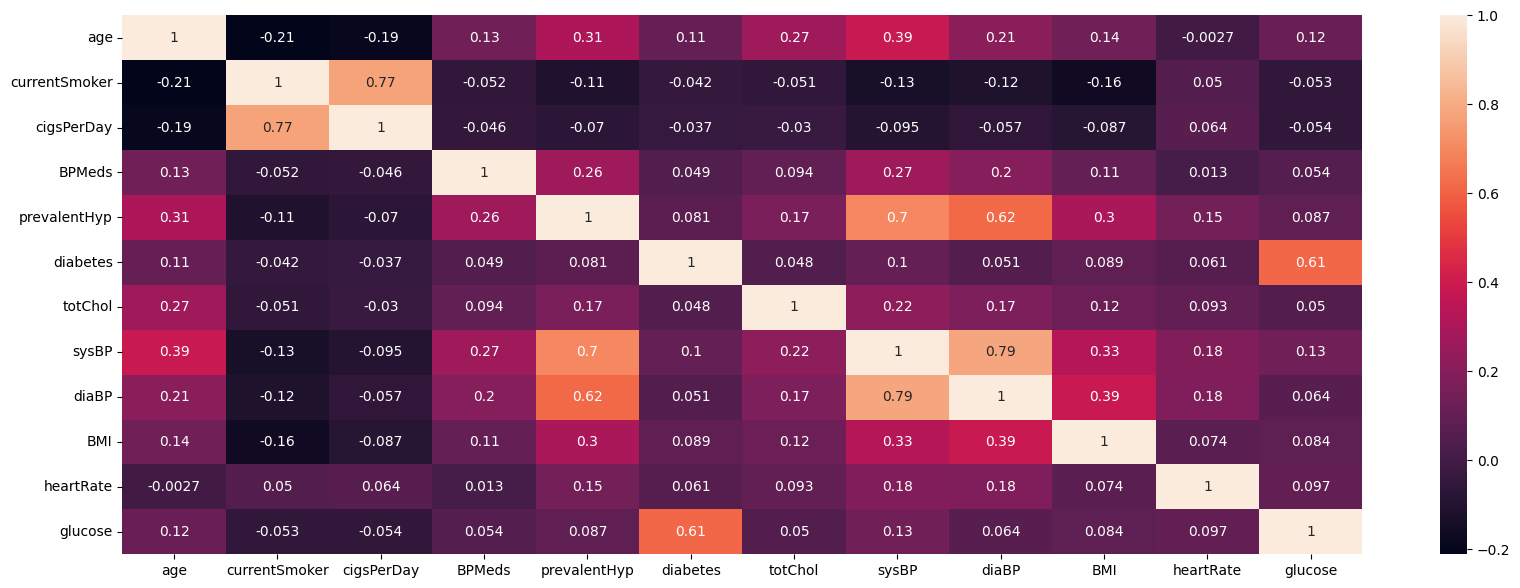

In [15]:
plt.figure(figsize=(20,7))
sns.heatmap(dados[numerical_features].corr(), annot=True)

<Axes: >

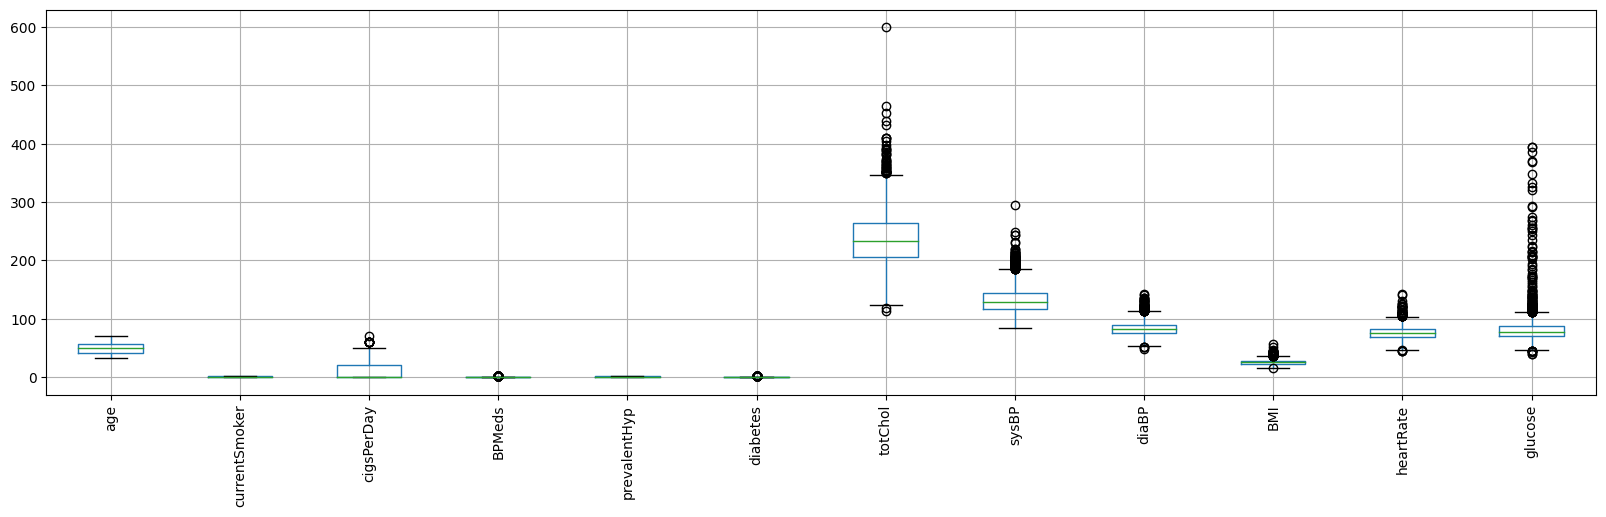

In [16]:
dados[numerical_features].boxplot( rot = 90, figsize=(20,5))

In [11]:
def draw_countplot(countplot_x, countplot_hue, countplot_data, figsize_a=20, figsize_b=10, xticks_rotation=45):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    plt.xticks(rotation = xticks_rotation)
    plt.rc('xtick',labelsize=8)
    sns.countplot(x = countplot_x, hue = countplot_hue, data = countplot_data)
    plt.legend(prop={'size': 30})
    plt.show()

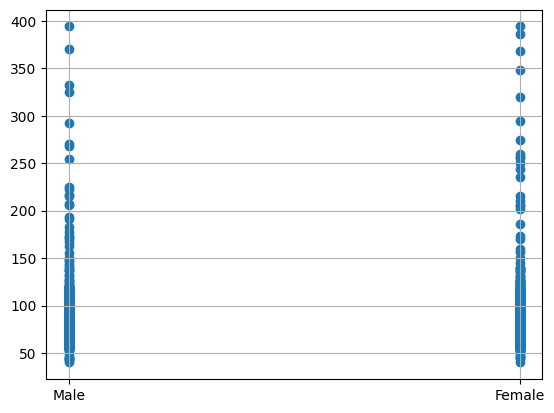

In [12]:
var = 'Gender'
plt.scatter(x = dados[var], y = dados['glucose'],)
plt.grid(True)

<Axes: ylabel='count'>

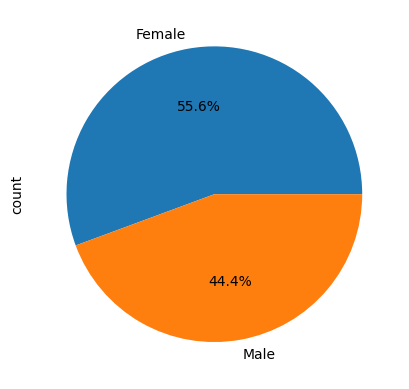

In [13]:
dados['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

In [14]:
def draw_countplot(countplot_x, countplot_hue, countplot_data, figsize_a=20, figsize_b=10, xticks_rotation=45):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    plt.xticks(rotation = xticks_rotation)
    plt.rc('xtick',labelsize=8)
    sns.countplot(x = countplot_x, hue = countplot_hue, data = countplot_data)
    plt.legend(prop={'size': 30})
    plt.show()

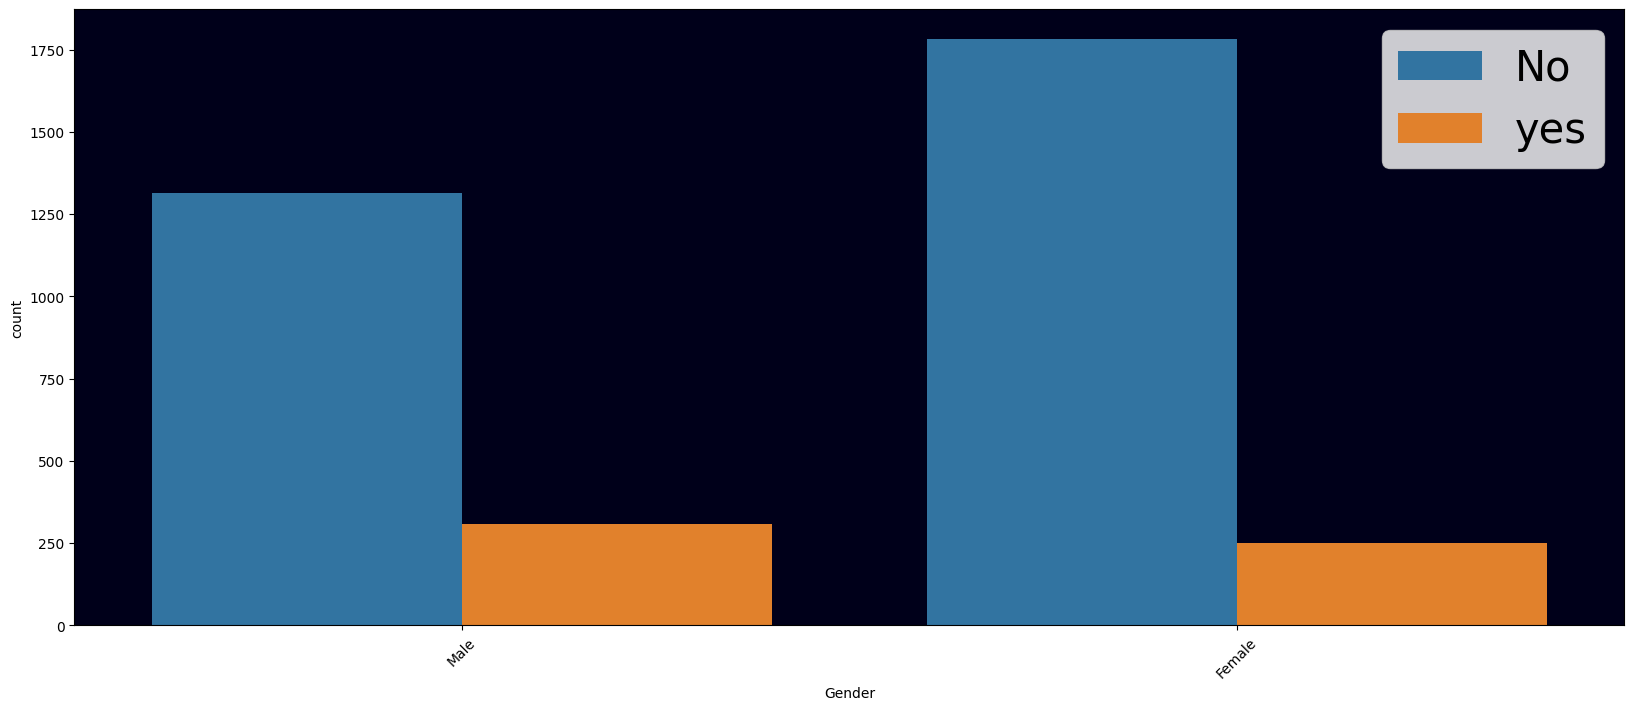

In [15]:
draw_countplot(countplot_x='Gender', countplot_hue='Heart_ stroke', countplot_data=dados)

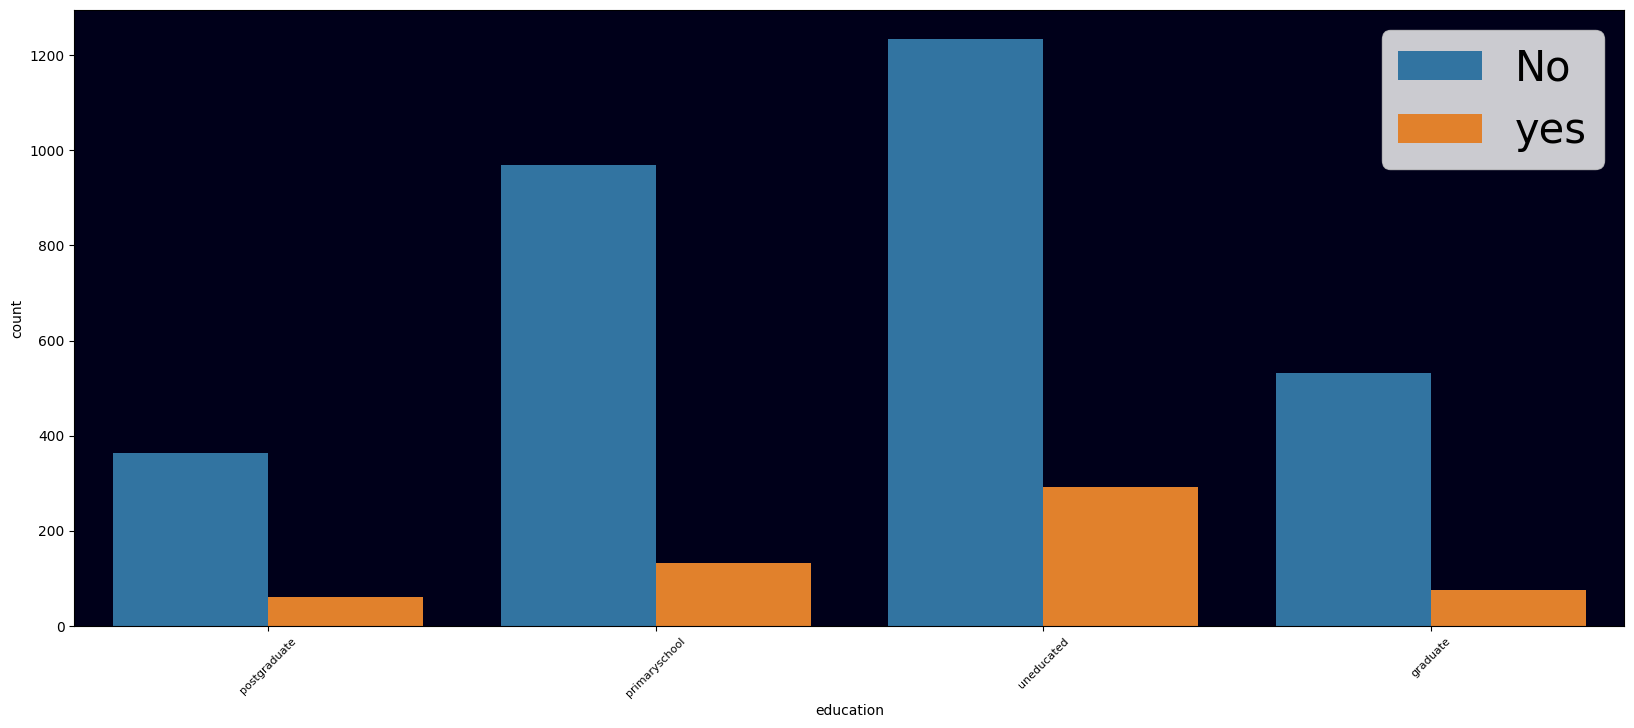

In [16]:
draw_countplot(countplot_x='education', countplot_hue='Heart_ stroke', countplot_data=dados)

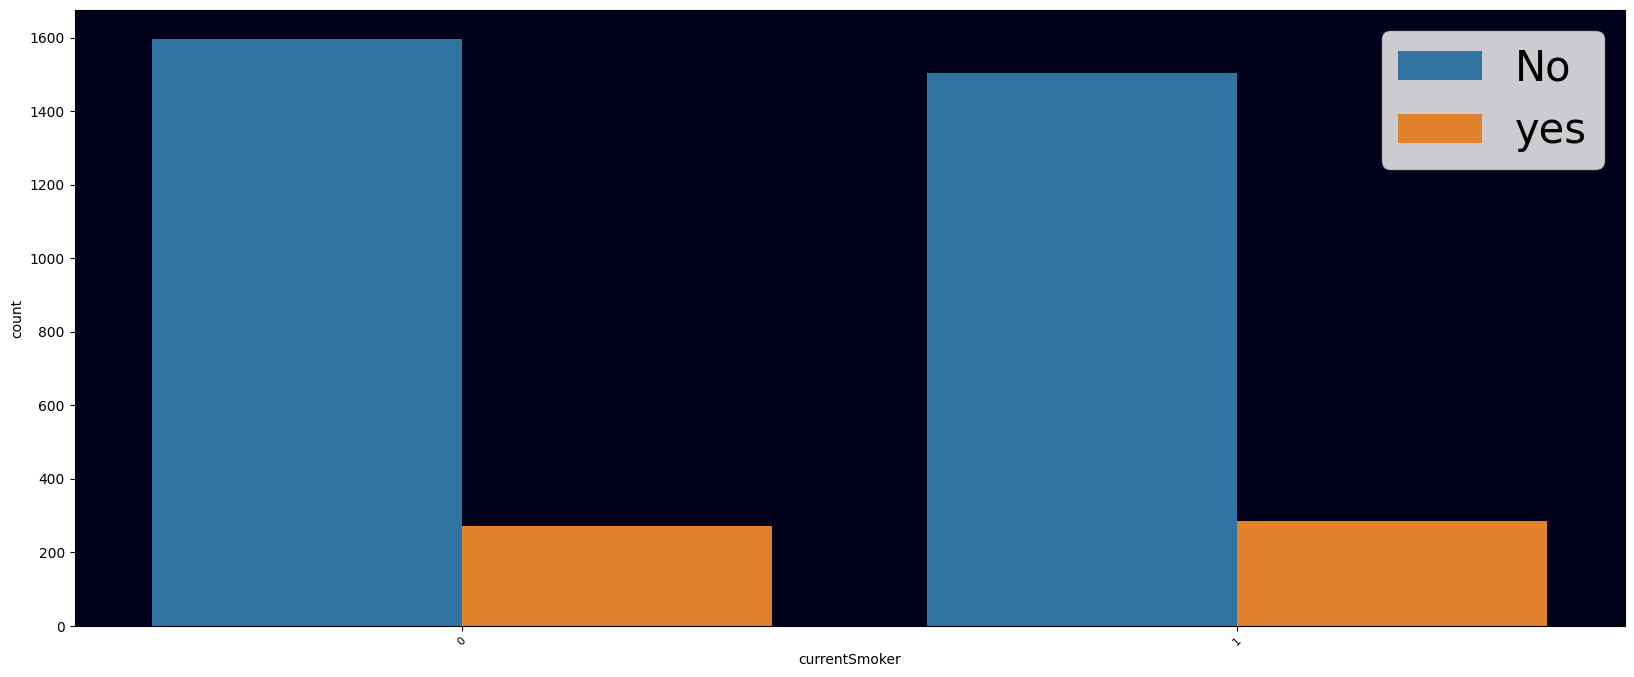

In [17]:
draw_countplot(countplot_x='currentSmoker', countplot_hue='Heart_ stroke', countplot_data=dados)

In [18]:
def draw_distplot(column, title = ""):
    
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    sns.distplot(column)

    mean_value = column.mean()
    plt.axvline(mean_value, c='red', linewidth=1.5, label="mean")

    median_value = column.median()
    plt.axvline(median_value, c='blue', linewidth=1.5, label="median")
    plt.legend(loc='upper right', prop={'size': 20})
    plt.title(title)
    plt.show()

C:\Users\Luan Lima\AppData\Local\Temp\ipykernel_14468\2598772794.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


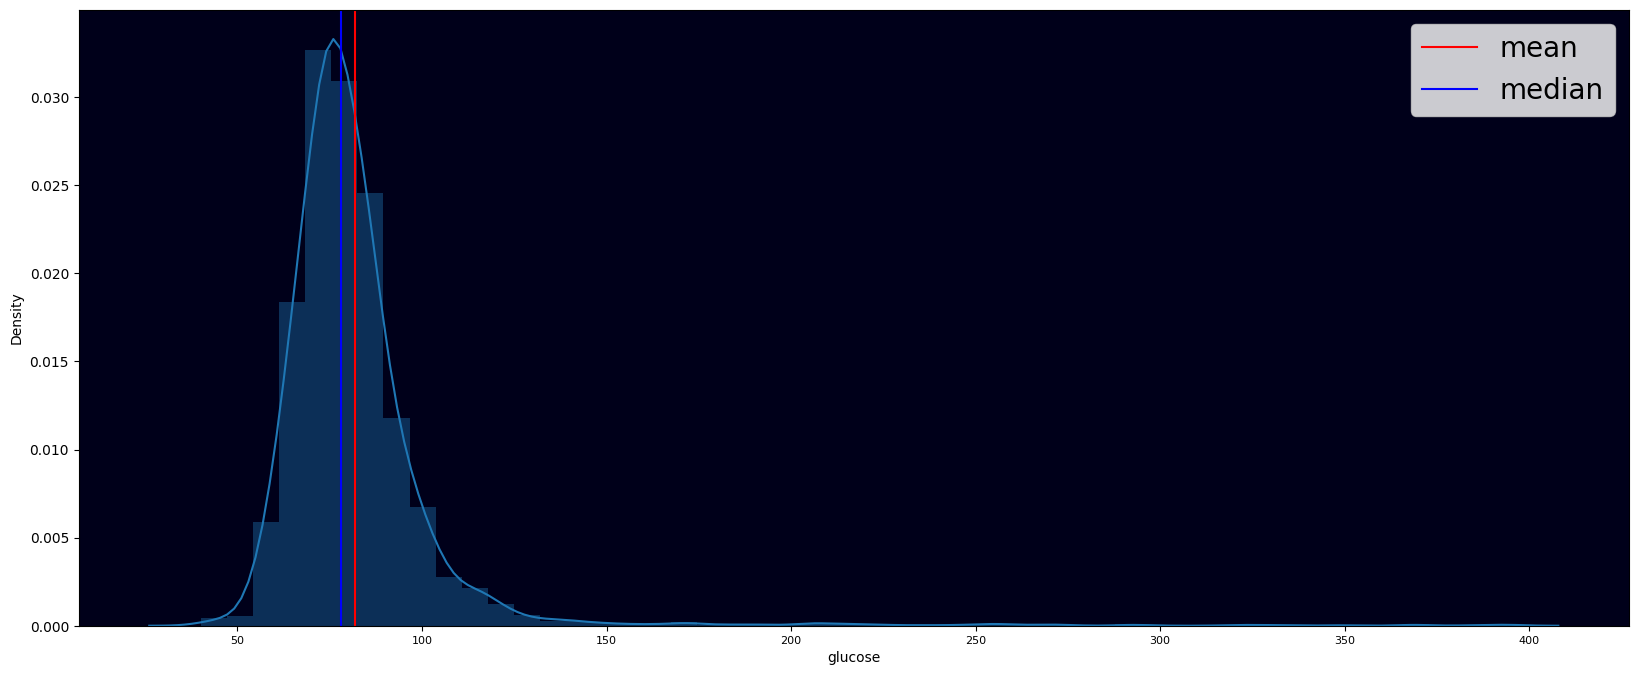

In [19]:
draw_distplot(column=dados['glucose'])

In [20]:
dados

Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
0       Male   39   postgraduate              0         0.0     0.0   
1     Female   46  primaryschool              0         0.0     0.0   
2       Male   48     uneducated              1        20.0     0.0   
3     Female   61       graduate              1        30.0     0.0   
4     Female   46       graduate              1        23.0     0.0   
...      ...  ...            ...            ...         ...     ...   
4231    Male   58       graduate              0         0.0     0.0   
4232    Male   68     uneducated              0         0.0     0.0   
4233    Male   50     uneducated              1         1.0     0.0   
4234    Male   51       graduate              1        43.0     0.0   
4237  Female   52  primaryschool              0         0.0     0.0   

     prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                 no             0         0    195.0  106.0   70.0  26.97   
1                 no             0         0    250.0  121.0   81.0  28.73   
2                 no             0         0    245.0  127.5   80.0  25.34   
3                 no             1         0    225.0  150.0   95.0  28.58   
4                 no             0         0    285.0  130.0   84.0  23.10   
...              ...           ...       ...      ...    ...    ...    ...   
4231              no             1         0    187.0  141.0   81.0  24.96   
4232              no             1         0    176.0  168.0   97.0  23.14   
4233              no             1         0    313.0  179.0   92.0  25.97   
4234              no             0         0    207.0  126.5   80.0  19.71   
4237              no             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose Heart_ stroke  
0          80.0     77.0            No  
1          95.0     76.0            No  
2          75.0     70.0            No  
3          65.0    103.0           yes  
4          85.0     85.0            No  
...         ...      ...           ...  
4231       80.0     81.0            No  
4232       60.0     79.0           yes  
4233       66.0     86.0           yes  
4234       65.0     68.0            No  
4237       80.0    107.0            No  

[3656 rows x 16 columns]

In [21]:
dados['Heart_ stroke'].unique()

array(['No', 'yes'], dtype=object)

In [22]:
dados.loc[dados['Heart_ stroke'] == 'No', 'Heart_ stroke'] = 0
dados.loc[dados['Heart_ stroke'] == 'yes', 'Heart_ stroke'] = 1

c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


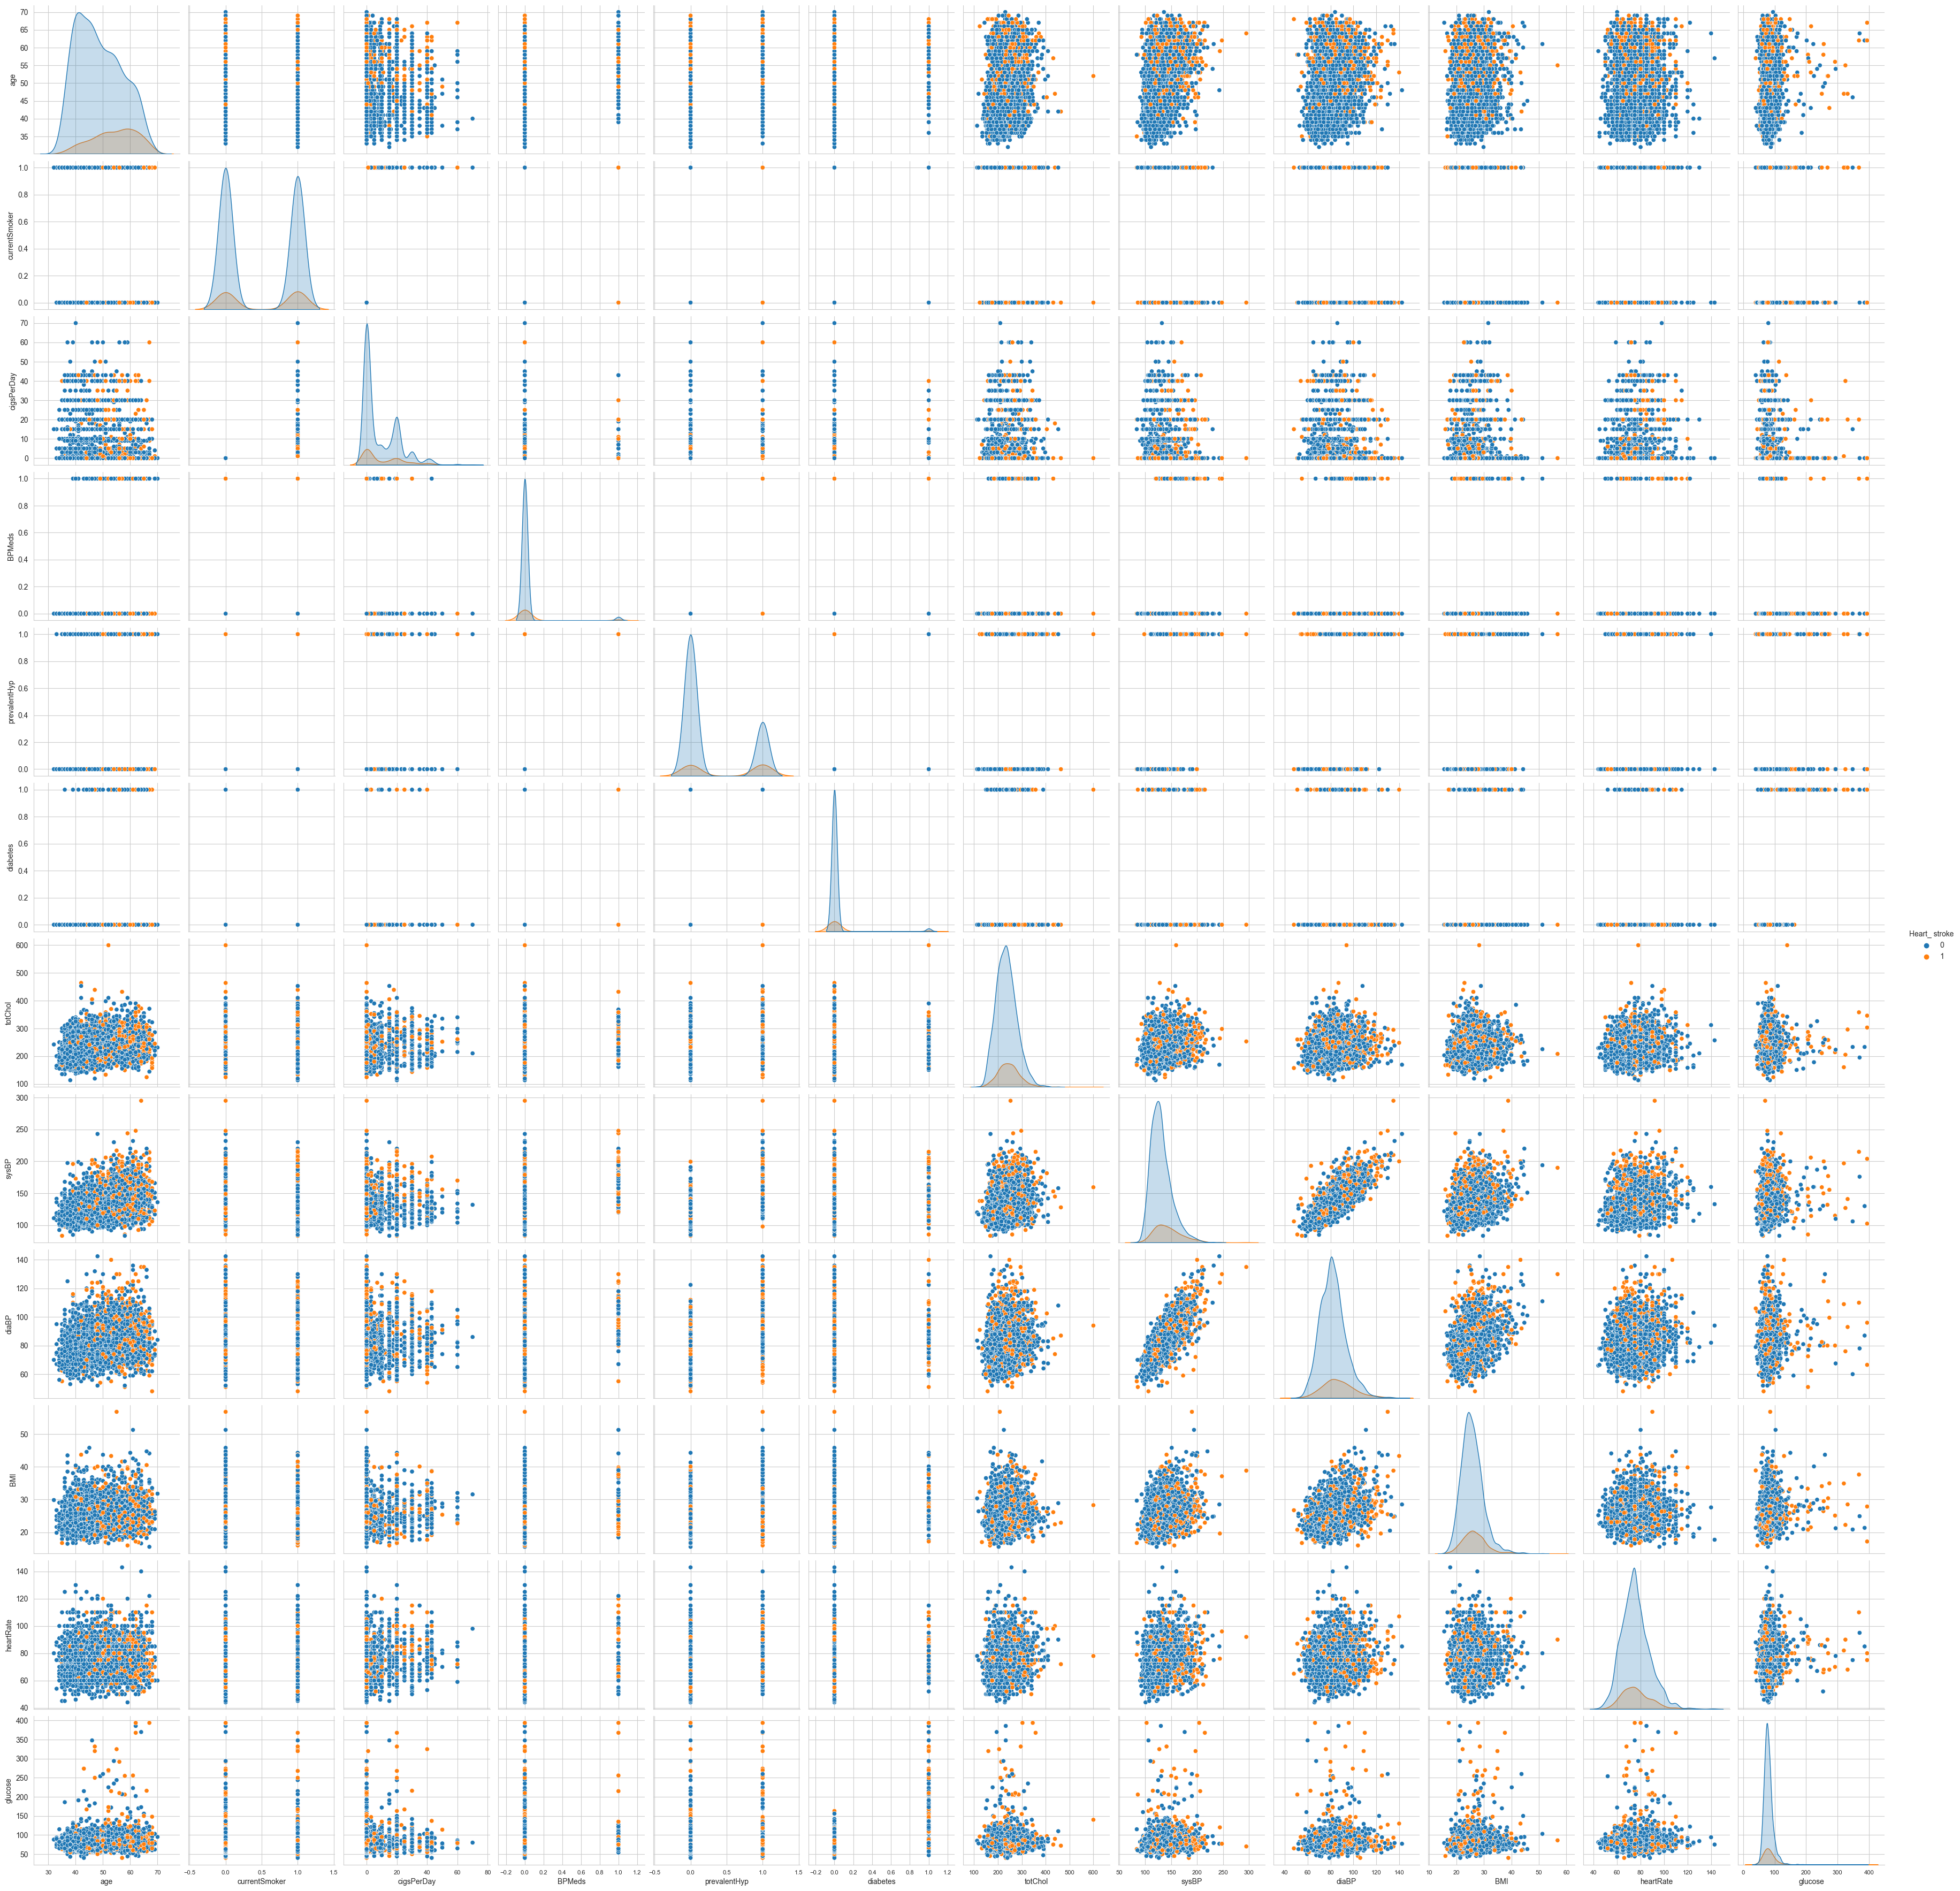

In [23]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(dados, hue='Heart_ stroke', height=3);
plt.show()

In [24]:
dados

Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
0       Male   39   postgraduate              0         0.0     0.0   
1     Female   46  primaryschool              0         0.0     0.0   
2       Male   48     uneducated              1        20.0     0.0   
3     Female   61       graduate              1        30.0     0.0   
4     Female   46       graduate              1        23.0     0.0   
...      ...  ...            ...            ...         ...     ...   
4231    Male   58       graduate              0         0.0     0.0   
4232    Male   68     uneducated              0         0.0     0.0   
4233    Male   50     uneducated              1         1.0     0.0   
4234    Male   51       graduate              1        43.0     0.0   
4237  Female   52  primaryschool              0         0.0     0.0   

     prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                 no             0         0    195.0  106.0   70.0  26.97   
1                 no             0         0    250.0  121.0   81.0  28.73   
2                 no             0         0    245.0  127.5   80.0  25.34   
3                 no             1         0    225.0  150.0   95.0  28.58   
4                 no             0         0    285.0  130.0   84.0  23.10   
...              ...           ...       ...      ...    ...    ...    ...   
4231              no             1         0    187.0  141.0   81.0  24.96   
4232              no             1         0    176.0  168.0   97.0  23.14   
4233              no             1         0    313.0  179.0   92.0  25.97   
4234              no             0         0    207.0  126.5   80.0  19.71   
4237              no             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose Heart_ stroke  
0          80.0     77.0             0  
1          95.0     76.0             0  
2          75.0     70.0             0  
3          65.0    103.0             1  
4          85.0     85.0             0  
...         ...      ...           ...  
4231       80.0     81.0             0  
4232       60.0     79.0             1  
4233       66.0     86.0             1  
4234       65.0     68.0             0  
4237       80.0    107.0             0  

[3656 rows x 16 columns]

c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


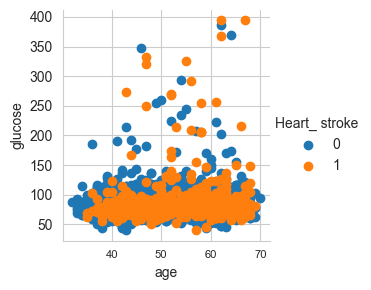

In [27]:
sns.set_style('whitegrid');
sns.FacetGrid(dados, hue='Heart_ stroke') \
.map(plt.scatter, 'age', 'glucose') \
.add_legend();
plt.show()

In [31]:
dados

Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
0       Male   39   postgraduate              0         0.0     0.0   
1     Female   46  primaryschool              0         0.0     0.0   
2       Male   48     uneducated              1        20.0     0.0   
3     Female   61       graduate              1        30.0     0.0   
4     Female   46       graduate              1        23.0     0.0   
...      ...  ...            ...            ...         ...     ...   
4231    Male   58       graduate              0         0.0     0.0   
4232    Male   68     uneducated              0         0.0     0.0   
4233    Male   50     uneducated              1         1.0     0.0   
4234    Male   51       graduate              1        43.0     0.0   
4237  Female   52  primaryschool              0         0.0     0.0   

     prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                 no             0         0    195.0  106.0   70.0  26.97   
1                 no             0         0    250.0  121.0   81.0  28.73   
2                 no             0         0    245.0  127.5   80.0  25.34   
3                 no             1         0    225.0  150.0   95.0  28.58   
4                 no             0         0    285.0  130.0   84.0  23.10   
...              ...           ...       ...      ...    ...    ...    ...   
4231              no             1         0    187.0  141.0   81.0  24.96   
4232              no             1         0    176.0  168.0   97.0  23.14   
4233              no             1         0    313.0  179.0   92.0  25.97   
4234              no             0         0    207.0  126.5   80.0  19.71   
4237              no             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose Heart_ stroke  
0          80.0     77.0             0  
1          95.0     76.0             0  
2          75.0     70.0             0  
3          65.0    103.0             1  
4          85.0     85.0             0  
...         ...      ...           ...  
4231       80.0     81.0             0  
4232       60.0     79.0             1  
4233       66.0     86.0             1  
4234       65.0     68.0             0  
4237       80.0    107.0             0  

[3656 rows x 16 columns]

In [28]:
dados['Heart_ stroke'] = dados['Heart_ stroke'].astype(int)

In [29]:
dados.dtypes

Gender              object
age                  int64
education           object
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke     object
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart_ stroke        int32
dtype: object

In [30]:
import category_encoders as ce

In [31]:
ce_OHE = ce.OneHotEncoder(cols=['Gender', 'education', 'prevalentStroke']) 
dados = ce_OHE.fit_transform(dados)
dados.head()

Gender_1  Gender_2  age  education_1  education_2  education_3  \
0         1         0   39            1            0            0   
1         0         1   46            0            1            0   
2         1         0   48            0            0            1   
3         0         1   61            0            0            0   
4         0         1   46            0            0            0   

   education_4  currentSmoker  cigsPerDay  BPMeds  ...  prevalentStroke_2  \
0            0              0         0.0     0.0  ...                  0   
1            0              0         0.0     0.0  ...                  0   
2            0              1        20.0     0.0  ...                  0   
3            1              1        30.0     0.0  ...                  0   
4            1              1        23.0     0.0  ...                  0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   Heart_ stroke  
0              0  
1              0  
2              0  
3              1  
4              0  

[5 rows x 21 columns]

In [32]:
X = dados.drop("Heart_ stroke", axis=1) 
y = dados["Heart_ stroke"]

In [33]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=14) 

In [34]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_jobs=-1,
                           random_state=14)


rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [35]:
len(X_train), len(y_train), len(X_test), len(y_test)

(2924, 2924, 732, 732)

In [36]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

def show_score(model):
  train_preds= model.predict(X_train)
  test_preds = model.predict(X_test)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Training MSE": mean_squared_log_error(y_train, train_preds),
            "Test MSE": mean_squared_log_error(y_test, test_preds),
            "Training RMSE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "Test RMSE": np.sqrt(mean_squared_log_error(y_test, test_preds)),
            "Training R2": r2_score(y_train, train_preds),
            "Test R2": r2_score(y_test, test_preds)}
  return scores

In [37]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [38]:
X = dados.drop("Heart_ stroke", axis=1) 
y = dados["Heart_ stroke"]

In [39]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1) 

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:

rf = DecisionTreeClassifier()


rf.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
print("model score: %.3f" % rf.score(X_test, y_test))

model score: 0.757


In [43]:
from sklearn.metrics import auc, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score

In [44]:
def ConfusionMatrix(classifier, X=X, y=y, confusionMatrix = True, plotConfusionMatrix = True):
        '''ConfusionMatrix function split data, fit data to model and give 
        a prediction for a given model and data. After that draw Confusion Matrix or 
        Plot Confusion Matrix to show the score'''
        #computing the confusion matrix with each row corresponding to the true class
        if(confusionMatrix):
            print(confusion_matrix(y_test, y_pred))

        #drawing Plot Confusion Matrix
        if(plotConfusionMatrix):
           ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)  
           a = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test) 
           print(a)
           plt.show() 

In [45]:
def drawRocCurve(classifier, nameClassifier, X_test, y_test):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = classifier.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('Random model: ROC AUC=%.3f' % (ns_auc))
    print(f'{nameClassifier}: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random model')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=nameClassifier)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    return lr_auc, lr_fpr, lr_tpr

Random model: ROC AUC=0.500
Decision Tree Classifier: ROC AUC=0.557


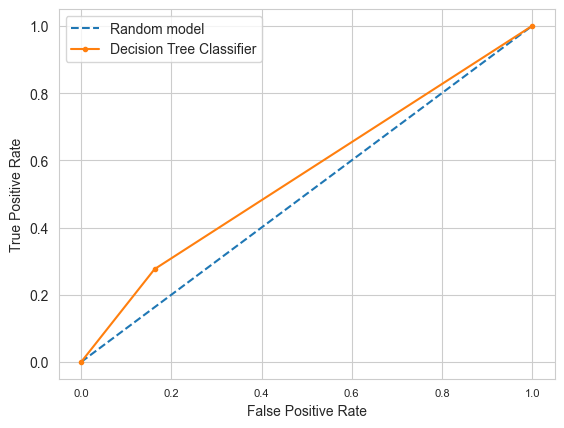

In [46]:
lr_auc_tree, lr_fpr_tree, lr_tpr_tree = drawRocCurve(rf, "Decision Tree Classifier", X_test, y_test)

In [47]:
show_score(rf)

{'Training MAE': 0.0,
 'Test MAE': 0.24316939890710382,
 'Training MSE': 0.0,
 'Test MSE': 0.11683147059759541,
 'Training RMSE': 0.0,
 'Test RMSE': 0.3418061886473026,
 'Training R2': 1.0,
 'Test R2': -0.9791296422875373}